# Digit Recognizer Solution Kuan Hoong

Kaggle competition description and data download:
https://www.kaggle.com/c/digit-recognizer/data

This tutorial is a jupyter notebooks version of the solutions by Kuan Hoong:
https://kuanhoong.wordpress.com/2016/02/01/r-and-deep-learning-cnn-for-handwritten-digits-recognition/

To run the tutorial, sign up for kaggle, download the data, and place the jupyter notebook code in the same folder as digit-recognizer which contains the data. 

## Step 1: Load the training dataset

In [14]:
train <- read.csv('digit-recognizer/train.csv')

In [15]:
# Create a 28*28 matrix with pixel color values
m = matrix(unlist(train[10,-1]), nrow = 28, byrow = TRUE)

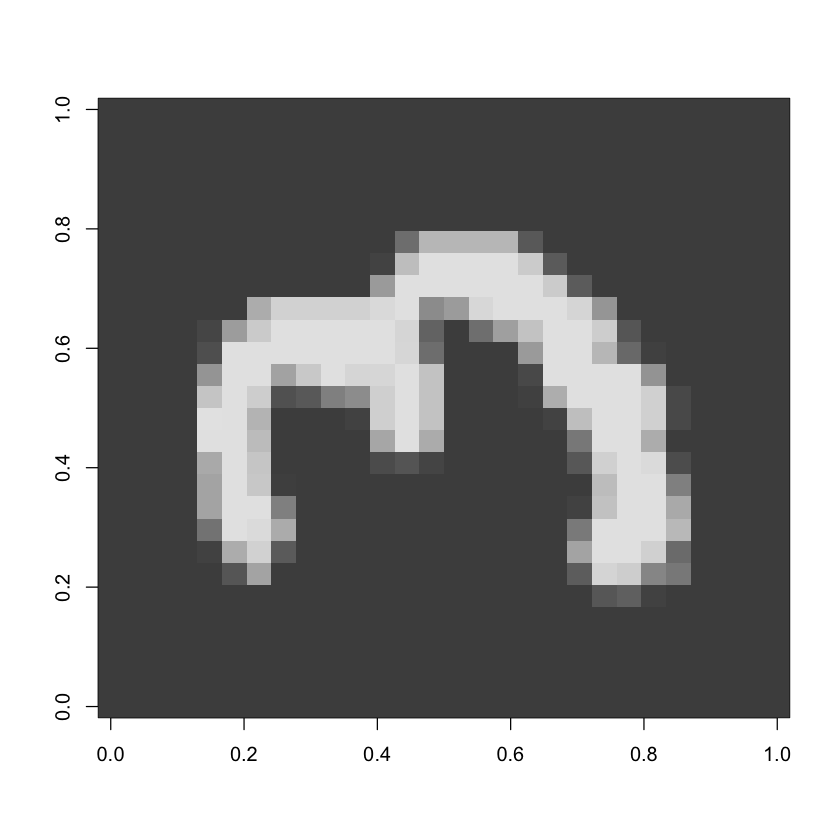

In [16]:
# Plot that matrix
image(m,col=grey.colors(255))

In [17]:
# reverses (rotates the matrix)
rotate <- function(x) t(apply(x, 2, rev))

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

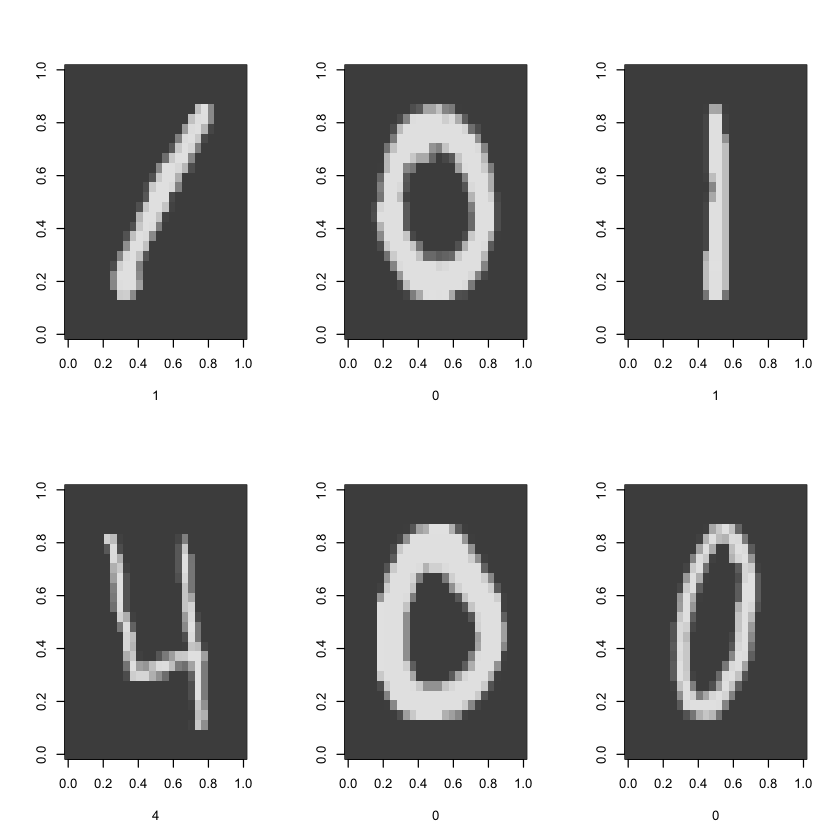

In [18]:
# Plot some of images
par(mfrow=c(2,3))
lapply(1:6, 
       function(x) image(
         rotate(matrix(unlist(train[x,-1]),nrow = 28, byrow = TRUE)),
         col=grey.colors(255),
         xlab=train[x,1]
       )
)
 
par(mfrow=c(1,1)) # set plot options back to default

## Step 2: Training-Test Set Split

In [22]:
library (caret)
inTrain<- createDataPartition(train$label, p=0.8, list=FALSE)
training<-train[inTrain,]
testing<-train[-inTrain,]

#store the datasets into .csv files
write.csv (training , file = "digit-recognizer/train-data.csv", row.names = FALSE) 
write.csv (testing , file = "digit-recognizer/test-data.csv", row.names = FALSE)

In [21]:
print(dim(train))
print(dim(training))
print(dim(testing))

[1] 42000   785
[1] 33602   785
[1] 8398  785


## Step 3: Load the h2o package

In [27]:
#The following two commands remove any previously installed H2O packages for R.
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

#Next, download packages that H2O depends on.
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}

#Download and install the H2O package for R.
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

[1] "A shutdown has been triggered. "


Removing package from ‘/Users/chpfei/Library/R/3.6/library’
(as ‘lib’ is unspecified)

Installing package into ‘/Users/chpfei/Library/R/3.6/library’
(as ‘lib’ is unspecified)



In [28]:
library(h2o)
 
#start a local h2o cluster
local.h2o <- h2o.init(ip = "localhost", port = 54321, startH2O = TRUE, nthreads=-1)



----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    %*%, %in%, &&, apply, as.factor, as.numeric, colnames, colnames<-,
    ifelse, is.character, is.factor, is.numeric, log, log10, log1p,
    log2, round, signif, trunc, ||





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /var/folders/3m/5fr3xn3150vbwkxcsk4t_79rfhnv0g/T//RtmpjAIXjm/h2o_chpfei_started_from_r.out
    /var/folders/3m/5fr3xn3150vbwkxcsk4t_79rfhnv0g/T//RtmpjAIXjm/h2o_chpfei_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 511 milliseconds 
    H2O cluster timezone:       Europe/Zurich 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.3 
    H2O cluster version age:    11 days  
    H2O cluster name:           H2O_started_from_R_chpfei_jwl614 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   8.00 GB 
    H2O cluster total cores:    12 
    H2O cluster allowed cores:  12 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Inte

In [29]:
training <- read.csv ("digit-recognizer/train-data.csv") 
testing  <- read.csv ("digit-recognizer/test-data.csv")
 
# convert digit labels to factor for classification
training[,1]<-as.factor(training[,1])
 
# pass dataframe from inside of the R environment to the H2O instance
trData<-as.h2o(training)
tsData<-as.h2o(testing)

  |======================================================================| 100%
  |======================================================================| 100%


## Step 4: Train the Model

In [30]:
res.dl <- h2o.deeplearning(x = 2:785, y = 1, trData, activation = "Tanh", hidden=rep(160,5),epochs = 20)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [pixel729, pixel644, pixel645, pixel448, pixel727, pixel728, pixel560, pixel52, pixel760, pixel10, pixel54, pixel53, pixel168, pixel56, pixel11, pixel55, pixel57, pixel16, pixel18, pixel17, pixel19, pixel754, pixel755, pixel756, pixel757, pixel758, pixel759, pixel83, pixel196, pixel82, pixel85, pixel671, pixel84, pixel111, pixel672, pixel112, pixel673, pixel476, pixel753, pixel392, pixel700, pixel701, pixel141, pixel780, pixel30, pixel781, pixel782, pixel420, pixel783, pixel31, pixel421, pixel140, pixel699, pixel139, pixel8, pixel9, pixel6, pixel7, pixel4, pixel5, pixel2, pixel3, pixel0, pixel21, pixel1, pixel20, pixel23, pixel532, pixel730, pixel22, pixel731, pixel25, pixel24, pixel27, pixel26, pixel29, pixel28].
”


  |======================================================================| 100%


## Step 5: Use the Model to Predict

In [31]:
#use model to predict testing dataset
pred.dl<-h2o.predict(object=res.dl, newdata=tsData[,-1])
pred.dl.df<-as.data.frame(pred.dl)
 
summary(pred.dl)
test_labels<-testing[,1]
 
#calculate number of correct prediction
sum(diag(table(test_labels,pred.dl.df[,1])))

  |======================================================================| 100%


Warning message in summary.H2OFrame(pred.dl):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”


 predict p0                  p1                  p2                 
 1:932   Min.   :7.814e-21   Min.   :1.904e-21   Min.   :2.201e-21  
 7:904   1st Qu.:7.814e-21   1st Qu.:1.904e-21   1st Qu.:2.201e-21  
 3:884   Median :7.814e-21   Median :1.904e-21   Median :2.201e-21  
 2:830   Mean   :9.744e-02   Mean   :1.106e-01   Mean   :9.898e-02  
 8:830   3rd Qu.:7.814e-21   3rd Qu.:1.904e-21   3rd Qu.:2.201e-21  
 6:821   Max.   :1.000e+00   Max.   :1.000e+00   Max.   :1.000e+00  
 p3                  p4                  p5                 
 Min.   :9.105e-22   Min.   :4.257e-22   Min.   :4.475e-21  
 1st Qu.:9.105e-22   1st Qu.:4.257e-22   1st Qu.:4.475e-21  
 Median :9.105e-22   Median :4.257e-22   Median :4.475e-21  
 Mean   :1.052e-01   Mean   :9.642e-02   Mean   :8.987e-02  
 3rd Qu.:9.105e-22   3rd Qu.:4.257e-22   3rd Qu.:4.475e-21  
 Max.   :1.000e+00   Max.   :1.000e+00   Max.   :1.000e+00  
 p6                  p7                  p8                 
 Min.   :1.964e-21   Min.   :

[1] 8136

## Step 6: Predict test.csv and submit to Kaggle

In [38]:
# read test.csv
test<-read.csv("digit-recognizer/test.csv")
 
test_h2o<-as.h2o(test)
 
# convert H2O format into data frame and save as csv
df.test <- as.data.frame(pred.dl.df)
df.test <- data.frame(ImageId = seq(1,length(df.test$predict)), Label = df.test$predict)
write.csv(df.test, file = "digit-recognizer/submission.csv", row.names=FALSE)
 
# shut down virtual H2O cluster
h2o.shutdown(prompt = FALSE)

  |======================================================================| 100%


[1] TRUE